
Poisson Distribution Analysis Summary

Theoretical Properties:
  1. E[X] = λ
  2. Var(X) = λ
  3. Sum of Poisson(λ₁) + Poisson(λ₂) = Poisson(λ₁ + λ₂)

Empirical Results:
--------------------------------------------------
         λ         Mean     Variance   Mean Error    Var Error
--------------------------------------------------
      0.50       0.4933       0.4992        1.34%        0.17%
      1.00       1.0084       1.0213        0.84%        2.13%
      2.00       1.9984       1.9988        0.08%        0.06%
      3.00       2.9837       2.9342        0.54%        2.19%
      5.00       5.0133       5.0147        0.27%        0.29%
      7.00       7.0034       6.9340        0.05%        0.94%
     10.00       9.9648       9.9616        0.35%        0.38%
     15.00      14.9914      14.7063        0.06%        1.96%


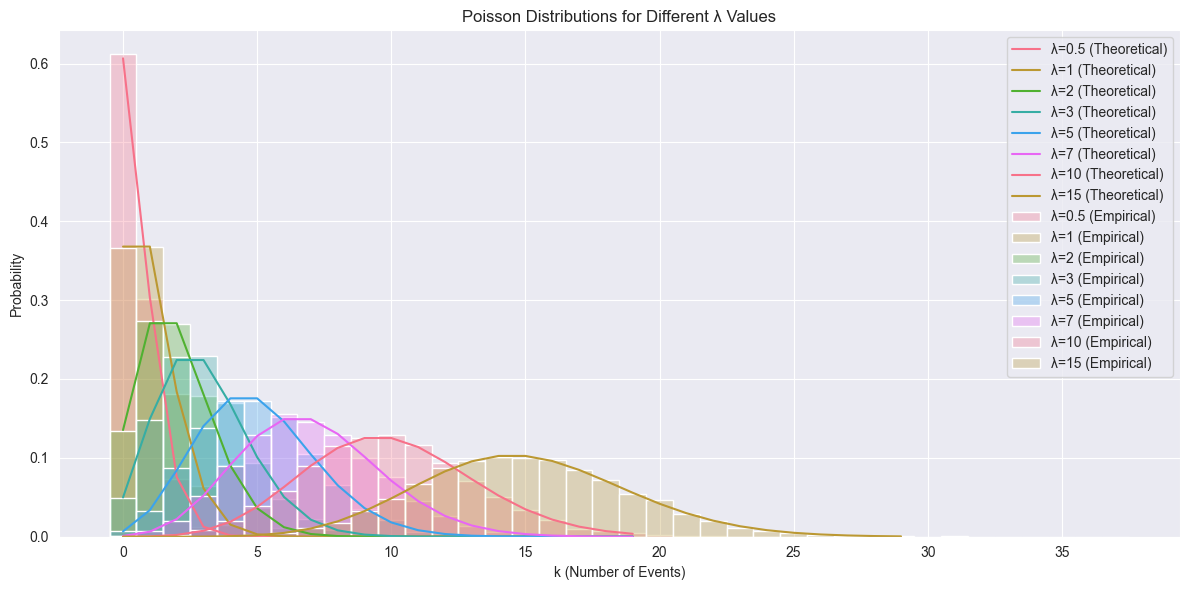

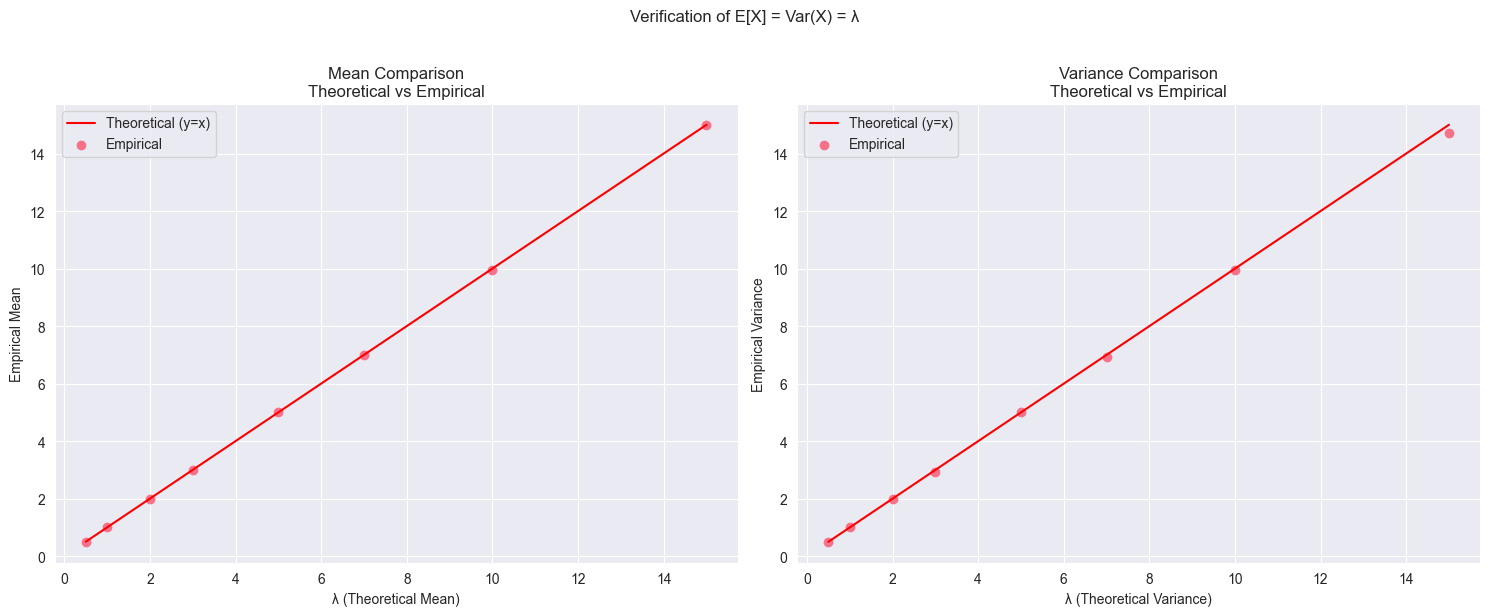

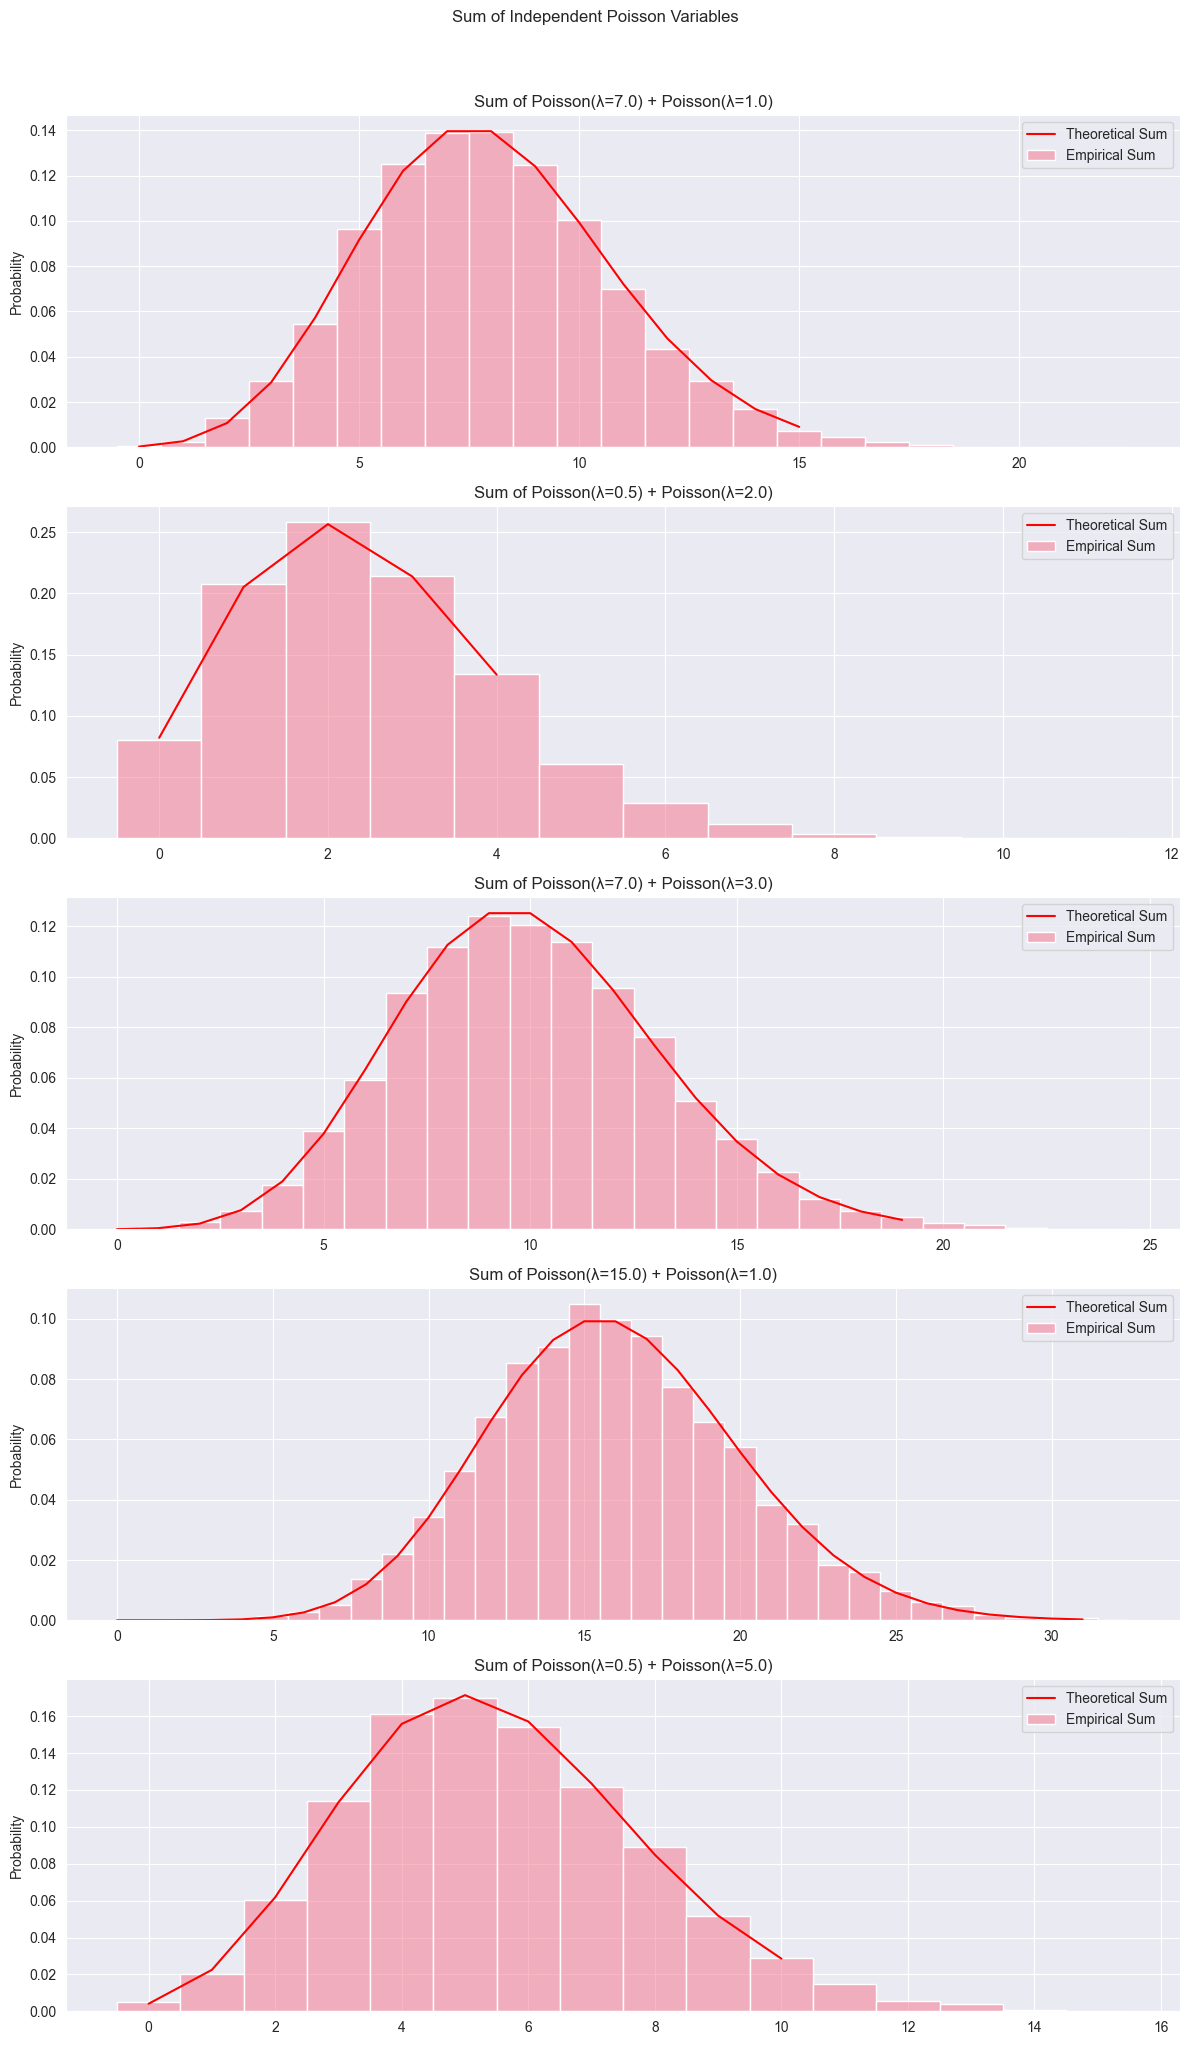

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import Tuple, List
import matplotlib.gridspec as gridspec
from dataclasses import dataclass
import warnings

class PoissonAnalysis:
    """
    A comprehensive analysis tool for exploring properties of the Poisson distribution.
    This class provides methods to visualize and verify the theoretical properties
    we derived, particularly the equality of mean and variance.
    """
    
    def __init__(self, lambda_params: List[float], n_samples: int = 10000):
        """
        Initialize the analysis with different lambda values to compare.
        
        Args:
            lambda_params: List of lambda values to analyze
            n_samples: Number of samples to generate for each lambda
        """
        self.lambda_params = lambda_params
        self.n_samples = n_samples
        self.samples = {}
        self.stats = {}
        
        # Generate samples for each lambda
        for lambda_val in lambda_params:
            self.samples[lambda_val] = np.random.poisson(lambda_val, n_samples)
            
            # Calculate empirical statistics
            self.stats[lambda_val] = {
                'mean': np.mean(self.samples[lambda_val]),
                'variance': np.var(self.samples[lambda_val]),
                'theoretical_mean': lambda_val,
                'theoretical_variance': lambda_val
            }

    def create_distribution_plot(self) -> plt.Figure:
        """
        Create a visualization of the Poisson distributions for different lambda values.
        Shows both theoretical PMF and empirical distributions.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        
        for lambda_val in self.lambda_params:
            # Calculate theoretical PMF
            k = np.arange(0, max(20, int(lambda_val * 2)))
            pmf = stats.poisson.pmf(k, lambda_val)
            
            # Plot theoretical PMF as lines
            ax.plot(k, pmf, '-', label=f'λ={lambda_val} (Theoretical)')
            
            # Plot empirical distribution as histograms
            sns.histplot(self.samples[lambda_val], stat='probability', 
                        alpha=0.3, label=f'λ={lambda_val} (Empirical)',
                        discrete=True)
            
        ax.set_title('Poisson Distribution: Theoretical vs Empirical')
        ax.set_xlabel('k (Number of Events)')
        ax.set_ylabel('Probability')
        ax.legend()
        return fig

    def create_mean_variance_comparison(self) -> plt.Figure:
        """
        Create a visualization demonstrating the equality of mean and variance.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Prepare data for plotting
        lambdas = np.array(self.lambda_params)
        empirical_means = [self.stats[l]['mean'] for l in lambdas]
        empirical_vars = [self.stats[l]['variance'] for l in lambdas]
        
        # Plot theoretical vs empirical means
        ax1.plot(lambdas, lambdas, 'r-', label='Theoretical (y=x)')
        ax1.scatter(lambdas, empirical_means, label='Empirical')
        ax1.set_title('Mean Comparison\nTheoretical vs Empirical')
        ax1.set_xlabel('λ (Theoretical Mean)')
        ax1.set_ylabel('Empirical Mean')
        ax1.legend()
        ax1.grid(True)
        
        # Plot theoretical vs empirical variances
        ax2.plot(lambdas, lambdas, 'r-', label='Theoretical (y=x)')
        ax2.scatter(lambdas, empirical_vars, label='Empirical')
        ax2.set_title('Variance Comparison\nTheoretical vs Empirical')
        ax2.set_xlabel('λ (Theoretical Variance)')
        ax2.set_ylabel('Empirical Variance')
        ax2.legend()
        ax2.grid(True)
        
        return fig

    def demonstrate_sum_property(self, n_combinations: int = 5) -> plt.Figure:
        """
        Demonstrate that the sum of independent Poisson variables is also Poisson.
        """
        fig, axes = plt.subplots(n_combinations, 1, figsize=(12, 4*n_combinations))
        
        for i in range(n_combinations):
            # Randomly select two lambda values
            lambda1, lambda2 = np.random.choice(self.lambda_params, 2, replace=False)
            
            # Generate new samples for the sum
            poisson1 = np.random.poisson(lambda1, self.n_samples)
            poisson2 = np.random.poisson(lambda2, self.n_samples)
            poisson_sum = poisson1 + poisson2
            
            # Calculate theoretical PMF for the sum
            k = np.arange(0, int((lambda1 + lambda2) * 2))
            pmf_sum = stats.poisson.pmf(k, lambda1 + lambda2)
            
            # Plot
            sns.histplot(poisson_sum, stat='probability', alpha=0.5,
                        label='Empirical Sum', discrete=True, ax=axes[i])
            axes[i].plot(k, pmf_sum, 'r-', label='Theoretical Sum')
            axes[i].set_title(f'Sum of Poisson(λ={lambda1}) + Poisson(λ={lambda2})')
            axes[i].legend()
            
        plt.tight_layout()
        return fig

    def print_statistical_summary(self):
        """
        Print a detailed statistical summary of the analysis.
        """
        print("\nPoisson Distribution Analysis Summary")
        print("=" * 50)
        print("\nTheoretical Properties:")
        print("  1. E[X] = λ")
        print("  2. Var(X) = λ")
        print("  3. Sum of Poisson(λ₁) + Poisson(λ₂) = Poisson(λ₁ + λ₂)")
        print("\nEmpirical Results:")
        print("-" * 50)
        print(f"{'λ':>10} {'Mean':>12} {'Variance':>12} {'Mean Error':>12} {'Var Error':>12}")
        print("-" * 50)
        
        for lambda_val in self.lambda_params:
            stats = self.stats[lambda_val]
            mean_error = abs(stats['mean'] - lambda_val) / lambda_val * 100
            var_error = abs(stats['variance'] - lambda_val) / lambda_val * 100
            
            print(f"{lambda_val:10.2f} {stats['mean']:12.4f} "
                  f"{stats['variance']:12.4f} {mean_error:11.2f}% {var_error:11.2f}%")

def main():
    """
    Main function to demonstrate Poisson distribution properties.
    """
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Create analysis object with various lambda values
    lambdas = [0.5, 1, 2, 3, 5, 7, 10, 15]
    analysis = PoissonAnalysis(lambdas)
    
    # Create visualizations
    sns.set_style('darkgrid')
    sns.set_palette("husl")
    warnings.filterwarnings('ignore')
    
    # Plot distributions
    fig1 = analysis.create_distribution_plot()
    plt.figure(fig1.number)
    plt.title("Poisson Distributions for Different λ Values")
    plt.tight_layout()
    
    # Plot mean-variance comparison
    fig2 = analysis.create_mean_variance_comparison()
    plt.figure(fig2.number)
    plt.suptitle("Verification of E[X] = Var(X) = λ", y=1.02)
    plt.tight_layout()
    
    # Demonstrate sum property
    fig3 = analysis.demonstrate_sum_property()
    plt.figure(fig3.number)
    plt.suptitle("Sum of Independent Poisson Variables", y=1.02)
    plt.tight_layout()
    
    # Print statistical summary
    analysis.print_statistical_summary()
    
    plt.show()

if __name__ == "__main__":
    main()